# Cellular Automaton 1D
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [cellularAutomaton1D.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Simulation/cellularAutomaton1D.ipynb)
---
Implementation of an uni-dimensional cellular automata of binary values.

<font color='#CC0000'>[<b>PT-BR</b> content]</font>

Implementação de um autômato celular unidimensional em valores binários.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np
import imageio

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.set_cmap('gray')

<Figure size 1152x576 with 0 Axes>

## 1. Definição da lista de regra
---
A função ***conjRegras*** resulta em uma lista de regras para definição de novos estados para as células centrais em gerações posteriores, com base em uma vizinhança definida por um diâmetro ímpar. Para uma vizinhança de diâmetro **3** existem $2^3=8$ padrões possíveis e $2^8=256$ possibilidades de regras. Da mesma forma, uma vizinhança de diâmetro **5** tem $2^5=32$ padrões possíveis e $2^{32}=4294967296L$ possibilidades de regras.

- Autômato celular com regra **27**

| x                                     | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |
|---------------------------------------|---|---|---|---|---|---|---|---|
| **estado atual**                      |111|110|101|100|011|010|001|000|
| **novo estado para células centrais** | 0 | 0 | 0 | 1 | 1 | 0 | 1 | 1 |

- Autômato celular com regra **53**

| x                                     | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |
|---------------------------------------|---|---|---|---|---|---|---|---|
| **estado atual**                      |111|110|101|100|011|010|001|000|
| **novo estado para células centrais** | 0 | 0 | 1 | 1 | 0 | 1 | 0 | 1 |

In [3]:
def conjRegras(regra, diametro):
    tamanho = 2**diametro
    bits = list('{0:0{1}b}'.format(regra, tamanho)[::-1])
    resultado = np.array(bits, dtype=np.int)
    return resultado

## 2. Tabela de regras
---
A função ***conjRegras_tab*** define a tabela de regras para visualização.

In [4]:
def conjRegras_tab(regra, diametro, disp=(8, 4)):
    '''
    Define a tabela do conjunto de regras
    '''
    s, t = disp
    S, T = s*(diametro + 1), 3*t
    raio = (diametro - 1)//2
    crt = np.ones((T, S), np.float32)*0.25
    crList = conjRegras(regra, diametro)
    total = 2**diametro
    indices = np.linspace(0, total - 1, s*t, dtype=np.int32)
    if total < s*t:
        indices = np.unique(indices)
    for j in range(t):
        for i in range(s):
            try:
                indice = indices[i + j*s]
                bits = list('{0:0{1}b}'.format(indice, diametro))
                bits = np.array(bits, dtype=np.int)
                iro = (diametro + 1)*i
                iri = iro + diametro
                jro = 3*j
                crt[jro, iro:iri] = bits
                crt[jro + 1, iro + raio] = crList[indice]
            except:
                pass
    return crt[:-1, :-1]

## 3. Definição do autômato celular
---
Gera autômato celular a partir da geração 0.

In [5]:
def automatoCelular(ger0, gers, regra, diametro):
    '''
    Gera autômato celular
    '''
    n = ger0.size
    raio = (diametro - 1)//2
    resultado = np.zeros((gers, n), np.float32)
    resultado[0] = ger0
    novoEstado = conjRegras(regra, diametro)
    for ger in range(1, gers):
        for i in range(n):
            vizinhanca = np.roll(resultado[ger - 1], - i + raio)[:diametro]
            binario = ''.join(map(str, vizinhanca.astype(int)))
            indice = int(binario, 2)
            resultado[ger, i] = novoEstado[indice]
    return resultado

## 4. Autômato
---

In [6]:
%%time
# Parâmetros
gers = 128
regra = 362
raio = 2

diametro = 2*raio + 1
regra %= 2**2**diametro

# Incialização da geração 0
celulas = 512
np.random.seed(sum(map(lambda c: ord(c), 'automato celular')))
ger0 = np.random.randint(0, 1 + 1, celulas).astype(np.float32)

# Autômato
ac = automatoCelular(ger0, gers, regra, diametro)

Wall time: 2.17 s


## 5. Visualização
---
### 5.1. Visualização do autômato
---

In [7]:
%%time
fig, ax = plt.subplots(figsize=(2048//72, 512//72))

AC = ac.copy()*0
def animation(frame):
    plt.cla()
    gen = frame*2
    AC[:gen] = ac[:gen]
    imshow = ax.imshow(AC, interpolation='none')
    ax.set_title('Cellular Automaton 1D | generation {:04}'.format(gen), fontsize=24)
    ax.set_xlabel('cells', fontsize=20)
    ax.set_ylabel('generations', fontsize=20)
    plt.tight_layout()
    return imshow

anim = manim.FuncAnimation(fig, animation, frames=gers//2 + 1, interval=100)

anim.save('output/NLDC_cellularAutomaton1D_anim.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert _output/NLDC_cellularAutomaton1D_anim.gif -loop 0 _output/NLDC_cellularAutomaton1D_anim.gif
! echo GIF exported and reconverted. Disregard the message above.

MovieWriter imagemagick unavailable.


GIF exported and reconverted. Disregard the message above.
Wall time: 18.8 s


![cellular automaton 1D](output/NLDC_cellularAutomaton1D_anim.gif "Cellular Automaton 1D")

### 5.2. Visualização da tabela de regra
---

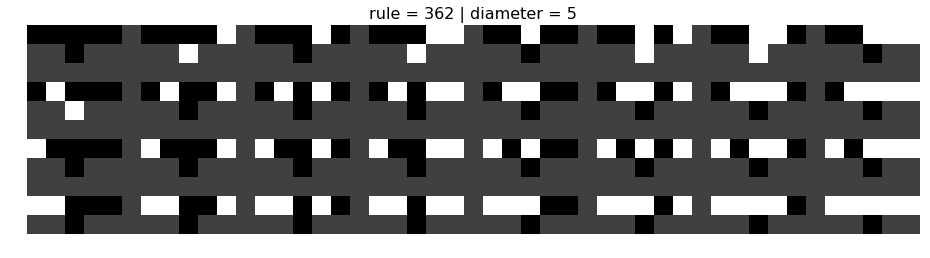

In [8]:
crt = conjRegras_tab(regra, diametro)
plt.imshow(crt, interpolation='none')
plt.axis('off')
titulo = 'rule = {}'.format(regra)
titulo += ' | diameter = {}'.format(diametro)
plt.title(titulo, fontsize=16)
plt.show()

## 6. Exemplos
---
### 6.1. autômato celular A
---

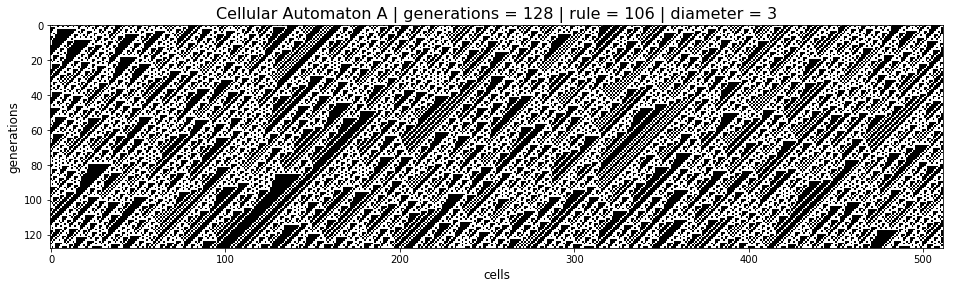

Wall time: 2.4 s


In [9]:
%%time
gers = 128
regra = 106
raio = 1

diametro = 2*raio + 1
regra %= 2**2**diametro

celulas = 512
np.random.seed(sum(map(lambda c: ord(c), 'cellular automaton A')))
ger0 = np.random.randint(0, 1 + 1, celulas).astype(np.float32)

acA = automatoCelular(ger0, gers, regra, diametro)

plt.imshow(acA, interpolation='none')
titulo = 'Cellular Automaton A'
titulo += ' | generations = {}'.format(gers)
titulo += ' | rule = {}'.format(regra)
titulo += ' | diameter = {}'.format(diametro)
plt.title(titulo, fontsize=16)

plt.xlabel('cells', fontsize=12)
plt.ylabel('generations', fontsize=12)
plt.show()

### 6.2. autômato celular B
---

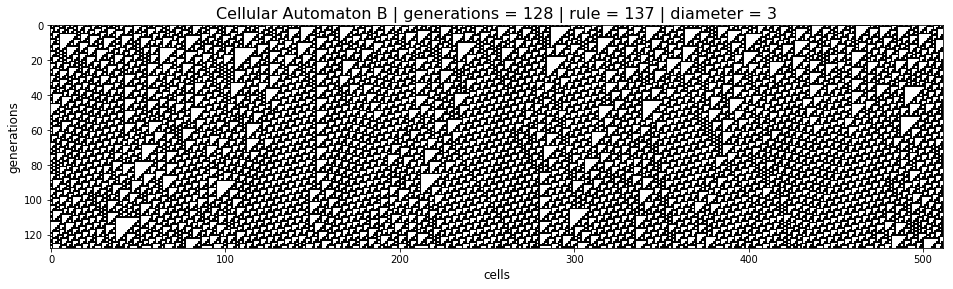

Wall time: 2.4 s


In [10]:
%%time
gers = 128
regra = 137
raio = 1

diametro = 2*raio + 1
regra %= 2**2**diametro

celulas = 512
np.random.seed(sum(map(lambda c: ord(c), 'cellular automaton B')))
ger0 = np.random.randint(0, 1 + 1, celulas).astype(np.float32)

acB = automatoCelular(ger0, gers, regra, diametro)

plt.imshow(acB, interpolation='none')
titulo = 'Cellular Automaton B'
titulo += ' | generations = {}'.format(gers)
titulo += ' | rule = {}'.format(regra)
titulo += ' | diameter = {}'.format(diametro)
plt.title(titulo, fontsize=16)

plt.xlabel('cells', fontsize=12)
plt.ylabel('generations', fontsize=12)
plt.show()

### 6.3. autômato celular C
---

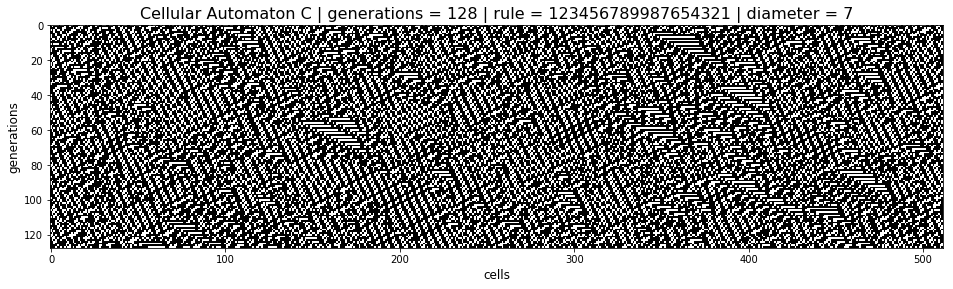

Wall time: 2.52 s


In [11]:
%%time
gers = 128
regra = 123456789987654321
raio = 3

diametro = 2*raio + 1
regra %= 2**2**diametro

celulas = 512
np.random.seed(sum(map(lambda c: ord(c), 'cellular automaton C')))
ger0 = np.random.randint(0, 1 + 1, celulas).astype(np.float32)

acC = automatoCelular(ger0, gers, regra, diametro)

plt.imshow(acC, interpolation='none')
titulo = 'Cellular Automaton C'
titulo += ' | generations = {}'.format(gers)
titulo += ' | rule = {}'.format(regra)
titulo += ' | diameter = {}'.format(diametro)
plt.title(titulo, fontsize=16)

plt.xlabel('cells', fontsize=12)
plt.ylabel('generations', fontsize=12)
plt.show()